In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [133]:
#load in the two files that make up a run of the multi-sprites data generation
#the images, and the masks corresponding to the objects in the image
val = np.load("processed/validation_images_rand4_unique.npy")
mask = np.load("processed/validation_masks_rand4_unique.npy")

#and now we added counts, total object area and image area..let's see what they look like.
obj_cnt = np.load("processed/validation_objcounts_rand4_unique.npy")
obj_area = np.load("processed/validation_objareas_rand4_unique.npy")
img_area = np.load("processed/validation_imgareas_rand4_unique.npy")

msprite_props=np.column_stack((obj_cnt, obj_area, img_area))

(10000, 3)


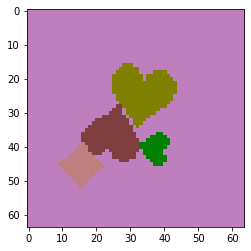

In [116]:
# the first image
plt.imshow(val[0])

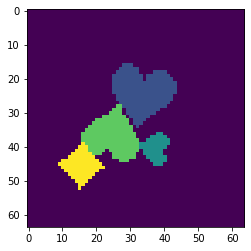

In [117]:
#the first mask
plt.imshow(mask[0])

In [118]:
#initial numpy's rng seed
np.random.seed(0)

[7891 4373 5874 6744 3468]
object count 2.0, object area 0.1044921875, image area 0.099365234375
object count 1.0, object area 0.017578125, image area 0.017578125
object count 2.0, object area 0.14453125, image area 0.14453125
object count 1.0, object area 0.07080078125, image area 0.07080078125
object count 3.0, object area 0.114990234375, image area 0.1142578125


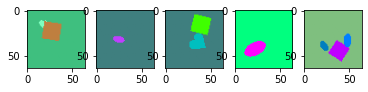

In [131]:
#let's look at a few random images
idx = np.random.randint(0, val.shape[0], 5)
print(idx)
fig = plt.figure()
for i in range(len(idx)):
    fig.add_subplot(1, len(idx), i+1)
    plt.imshow(val[idx[i]])
plt.show
for i in range(len(idx)):
    print(f'object count {obj_cnt[idx[i]]}, object area {obj_area[idx[i]]}, image area {img_area[idx[i]]}')


<function matplotlib.pyplot.show(close=None, block=None)>

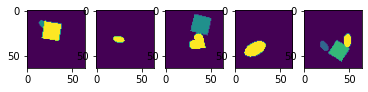

In [132]:
fig = plt.figure()
for i in range(len(idx)):
    fig.add_subplot(1, len(idx), i+1)
    plt.imshow(mask[idx[i]])
plt.show

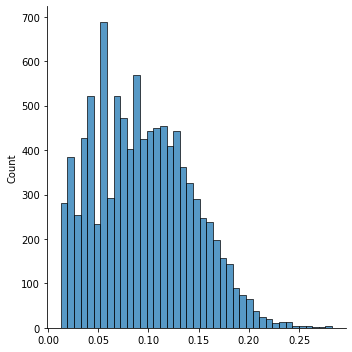

In [139]:
sb.displot(msprite_props[:, 2], common_norm=False)

[[0.0546875  0.02270508 0.02490234 ... 0.02563477 0.0324707  0.07080078]]


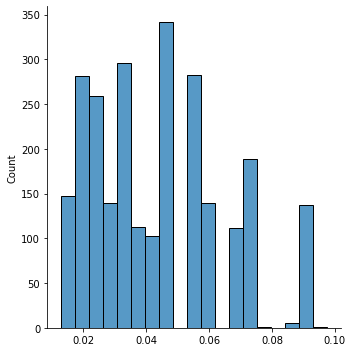

In [143]:
class_index = np.where(msprite_props[:,0]==1)
msprite_cnt1_props = msprite_props[class_index, 2]
print(msprite_cnt1_props)
sb.displot(msprite_cnt1_props[0], common_norm=False)

[[0.11328125 0.05664062 0.06298828 ... 0.05883789 0.10424805 0.05151367]]


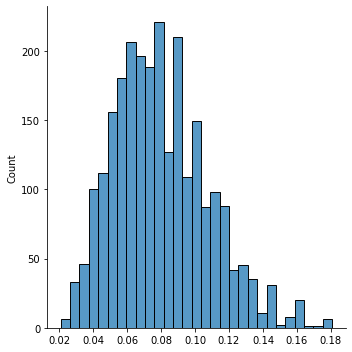

In [144]:
class_index = np.where(msprite_props[:,0]==2)
msprite_cnt1_props = msprite_props[class_index, 2]
print(msprite_cnt1_props)
sb.displot(msprite_cnt1_props[0], common_norm=False)

[[0.12890625 0.203125   0.17480469 ... 0.07910156 0.05737305 0.07202148]]


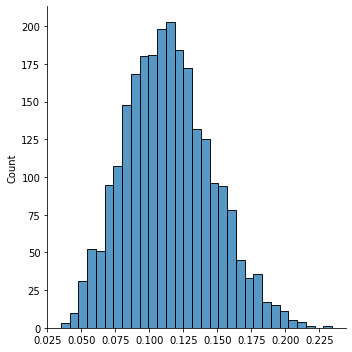

In [145]:
class_index = np.where(msprite_props[:,0]==3)
msprite_cnt1_props = msprite_props[class_index, 2]
print(msprite_cnt1_props)
sb.displot(msprite_cnt1_props[0], common_norm=False)

[[0.1340332  0.17407227 0.13208008 ... 0.23217773 0.12695312 0.125     ]]


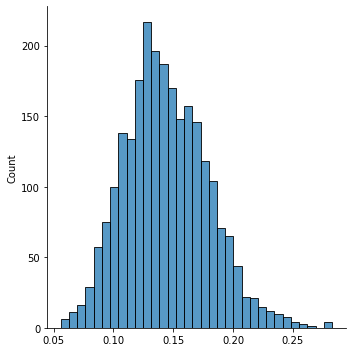

In [146]:
class_index = np.where(msprite_props[:,0]==4)
msprite_cnt1_props = msprite_props[class_index, 2]
print(msprite_cnt1_props)
sb.displot(msprite_cnt1_props[0], common_norm=False)

In [95]:
#let's examine the data used by the multi-dsprintes dataset generator
dsprites_orig = np.load("./dsprites-dataset/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz", encoding='latin1', allow_pickle=True)

files = dsprites_orig.files
print("The metadata")
print(dsprites_orig['metadata'])
print(f"\nTotal items in the dataset {len(dsprites_orig['latents_values'][:,1])}")
#The minimum and maximum values of the classes
print("\nlatent_classes minimum and maximum values")
print(dsprites_orig['latents_classes'].min(axis=0))
print(dsprites_orig['latents_classes'].max(axis=0))
#The minimum and maximum values of the values
print("\nlatent_values minimum and maximum values")
print(dsprites_orig['latents_values'].min(axis=0))
print(dsprites_orig['latents_values'].max(axis=0))


The metadata
{'date': 'April 2017', 'description': 'Disentanglement test Sprites dataset.Procedurally generated 2D shapes, from 6 disentangled latent factors.This dataset uses 6 latents, controlling the color, shape, scale, rotation and position of a sprite. All possible variations of the latents are present. Ordering along dimension 1 is fixed and can be mapped back to the exact latent values that generated that image.We made sure that the pixel outputs are different. No noise added.', 'version': 1, 'latents_names': ('color', 'shape', 'scale', 'orientation', 'posX', 'posY'), 'latents_possible_values': {'orientation': array([0.        , 0.16110732, 0.32221463, 0.48332195, 0.64442926,
       0.80553658, 0.96664389, 1.12775121, 1.28885852, 1.44996584,
       1.61107316, 1.77218047, 1.93328779, 2.0943951 , 2.25550242,
       2.41660973, 2.57771705, 2.73882436, 2.89993168, 3.061039  ,
       3.22214631, 3.38325363, 3.54436094, 3.70546826, 3.86657557,
       4.02768289, 4.1887902 , 4.349897

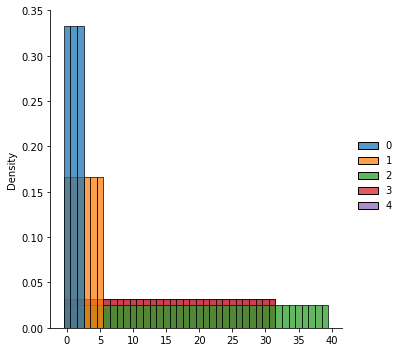

In [97]:
#Let's see if the values within each class are uniformly distributed
#ignore index '0' as that is color, but there is only one color in the dataset
sb.displot(dsprites_orig['latents_classes'][:, 1:6], stat='density', common_norm=False, discrete=True)

[[0 0 0 ... 5 5 5]]


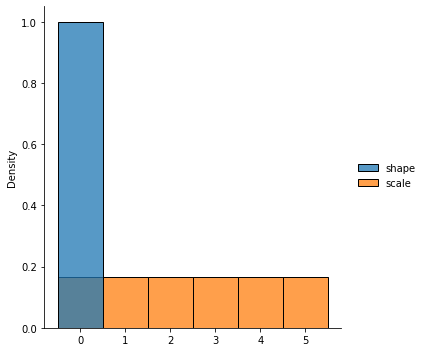

In [79]:
#let's examine each shape individually to see how scale is distributed
class_index = np.where(dsprites_orig['latents_classes'][:,1]==0)
print(dsprites_orig['latents_classes'][class_index,2])
single_class_expdata = {'shape':dsprites_orig['latents_classes'][class_index,1][0], 'scale':dsprites_orig['latents_classes'][class_index,2][0]}
sb.displot(single_class_expdata, stat='density', common_norm=False, discrete=True)

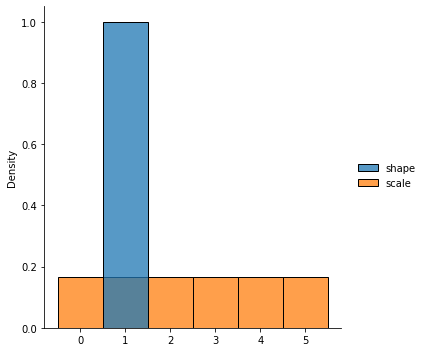

In [80]:
class_index = np.where(dsprites_orig['latents_classes'][:,1]==1)
single_class_expdata = {'shape':dsprites_orig['latents_classes'][class_index,1][0], 'scale':dsprites_orig['latents_classes'][class_index,2][0]}
sb.displot(single_class_expdata, stat='density', common_norm=False, discrete=True)

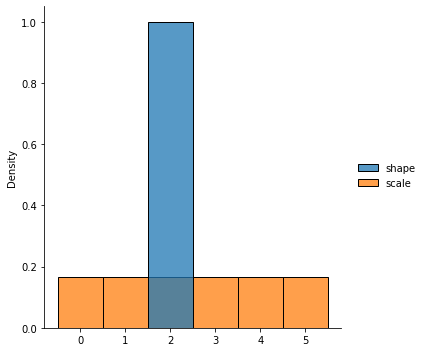

In [81]:
class_index = np.where(dsprites_orig['latents_classes'][:,1]==2)
single_class_expdata = {'shape':dsprites_orig['latents_classes'][class_index,1][0], 'scale':dsprites_orig['latents_classes'][class_index,2][0]}
sb.displot(single_class_expdata, stat='density', common_norm=False, discrete=True)

In [106]:
#wondering how to get seaborn to see 'groups', as it seems to be able to do this with pandas and I'd like
# the three above plots on one figure...no luck so far,
#if the displot line is uncommented, it will fault with 
#TypeError: unhashable type: 'numpy.ndarray'
class_1_index = np.where(dsprites_orig['latents_classes'][:,1]==0)
class_2_index = np.where(dsprites_orig['latents_classes'][:,1]==1)
class_3_index = np.where(dsprites_orig['latents_classes'][:,1]==2)
print(len(class_1_index[0]))
single_class_expdata = {'shape':{'heart':dsprites_orig['latents_classes'][class_1_index,1][0],
                                 'square':dsprites_orig['latents_classes'][class_2_index,1][0],
                                 'oval':dsprites_orig['latents_classes'][class_3_index,1][0]},
                        'scale':{'heart':dsprites_orig['latents_classes'][class_1_index,2][0],
                                 'square':dsprites_orig['latents_classes'][class_2_index,2][0],
                                 'oval':dsprites_orig['latents_classes'][class_3_index,2][0]}}
print(single_class_expdata)
#sb.displot(single_class_expdata, x="scale", hue="shape", stat='density', common_norm=False, discrete=True)

245760
{'shape': {'heart': array([0, 0, 0, ..., 0, 0, 0]), 'square': array([1, 1, 1, ..., 1, 1, 1]), 'oval': array([2, 2, 2, ..., 2, 2, 2])}, 'scale': {'heart': array([0, 0, 0, ..., 5, 5, 5]), 'square': array([0, 0, 0, ..., 5, 5, 5]), 'oval': array([0, 0, 0, ..., 5, 5, 5])}}
